this ipynb file is aimed at performing EDA analysis through achieving several calculations and providing graphs of the calculated results.

the first part import seaborn library which is useful for creating interactive plots. alongside this, cufflinks library was implemened for data vectorization. data were loaded and number of negative tweets were calculated as well as number of positive tweets.

C:\Users\20101\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



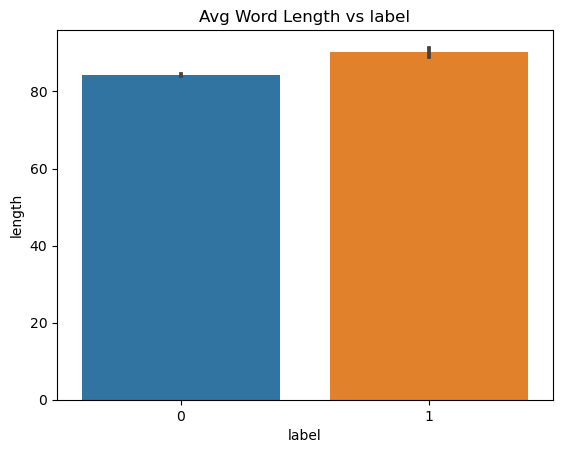

In [131]:
import seaborn
import cufflinks as cl
import matplotlib.pyplot as plt
import pandas as pd
trainpanda=pd.read_csv('train_E6oV3lV.csv')
trainpanda['length'] = trainpanda['tweet'].apply(len)
train['label'].value_counts().compute().get(0,0)#positive speech
train['label'].value_counts().compute().get(1,0)#negative speech
train['label'].value_counts().compute()
#trainpanda=pd.DataFrame(trainpanda)
plt.title('Avg Word Length vs label')
plot=seaborn.barplot('label','length',data = trainpanda)
ploting=plot.get_figure()

Text(0.5, 1.0, 'Label Count')

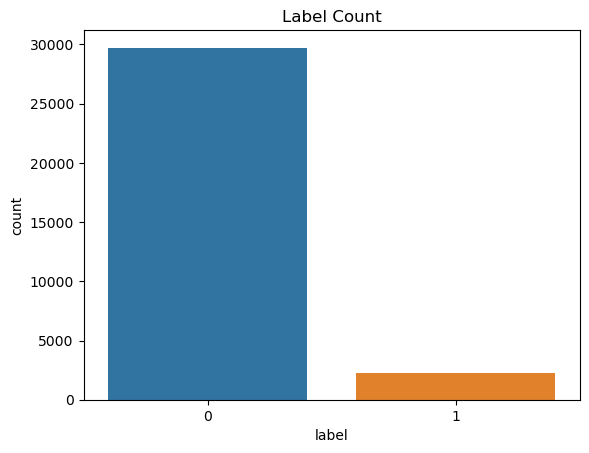

In [133]:
vcounts=seaborn.countplot(x= 'label', data=trainpanda)
plt.title('Label Count')

In [134]:
cl.go_offline()
cl.set_config_file(offline=False, world_readable=True)
trainpanda['length'].iplot(kind='hist',bins=100,xTitle='word count',linecolor='black',yTitle='count',title='Review Text Word Count Distribution')

In [154]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy
vector=CountVectorizer()
filtered_negative = trainpanda[trainpanda['label'] == 1].copy()
filtered_positive = trainpanda[trainpanda['label'] == 0].copy()
X = vector.fit_transform(filtered_negative['tweet'])#negative tweets vectorization of words
####negative tweets
summed=numpy.sum(X,axis=0)#summing the frequency f each word to know the amunt of each word mentioned
focus=numpy.squeeze(numpy.asarray(summed))#turning them into one dimension array
frequency_all = pd.DataFrame([focus], columns=vector.get_feature_names()).transpose()#transposing the array and making it a dataframe
frequency_all=frequency_all.sort_values(by=0,ascending=False)#sorting in descending



C:\Users\20101\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Text(0.5, 1.0, 'Word Frequency for hate words')

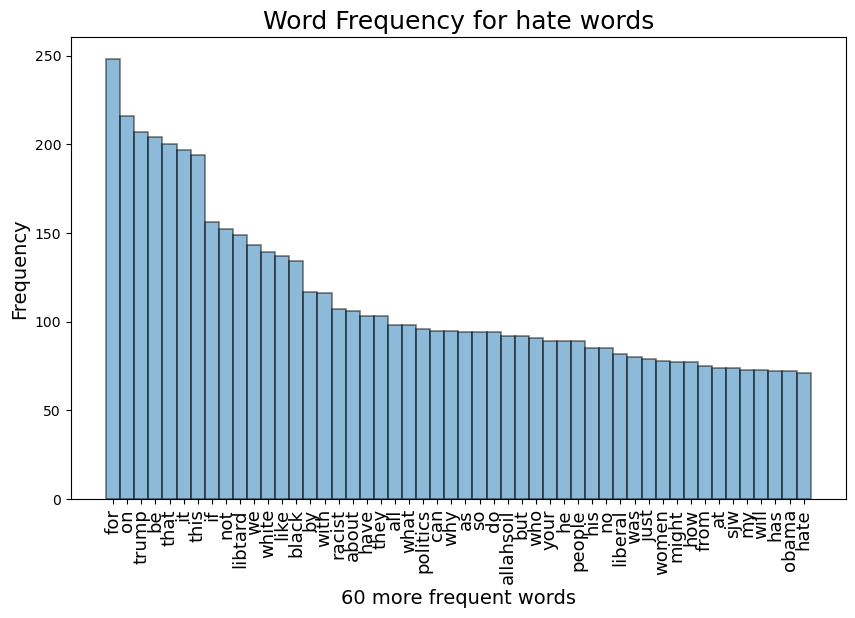

In [166]:
#X_dense = X.toarray()
frequency_all[0][10:60]
labels = frequency_all[0][10:60].index
title = "Word Frequency for hate words"
#Plot the figures
plt.figure(figsize=(10,6))
plt.bar(numpy.arange(50), frequency_all[0][10:60], width = 1, alpha=0.5, 
        edgecolor = "black", capsize=9, linewidth=1.2);
plt.xticks(numpy.arange(50), labels, rotation=90, size=13);
plt.xlabel("60 more frequent words", size=14);
plt.ylabel("Frequency", size=14);
#plt.title('Word Frequency for %s', size=18) %sent;
plt.title(title, size=18)